In [1]:
import pandas as pd

df = pd.read_csv("../data/fuel.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    15 non-null     float64
 1   Cylinders                         15 non-null     int64  
 2   Fuel Consumption Comb (L/100 km)  15 non-null     float64
 3   CO2 Emissions(g/km)               15 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 612.0 bytes


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,15.000000,15.000000,15.000000,15.000000
mean,2.886667,5.133333,10.040000,224.266667
std,1.255199,1.552264,2.682962,54.843240
min,1.500000,3.000000,6.900000,158.000000
25%,2.000000,4.000000,8.050000,184.000000
50%,2.500000,4.000000,9.100000,205.000000
75%,3.550000,6.000000,11.350000,254.000000
max,5.700000,8.000000,15.900000,340.000000


In [2]:
big_engines = df[df["Engine Size(L)"]>3.0]
big_engines.head()

avg_consumption = df["Fuel Consumption Comb (L/100 km)"].mean()
print(avg_consumption)

sorted_df = df.sort_values(by="Fuel Consumption Comb (L/100 km)", ascending=False)
sorted_df.head()


10.04


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
11,5.7,8,15.9,340
5,5.0,8,14.8,320
10,4.0,6,12.2,270
9,3.6,6,11.5,258
4,3.5,6,11.2,250


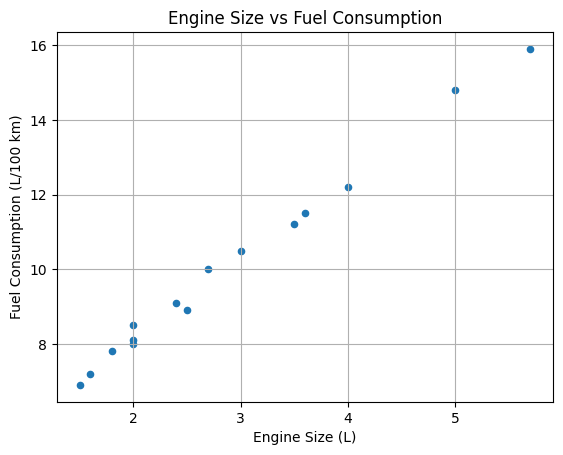

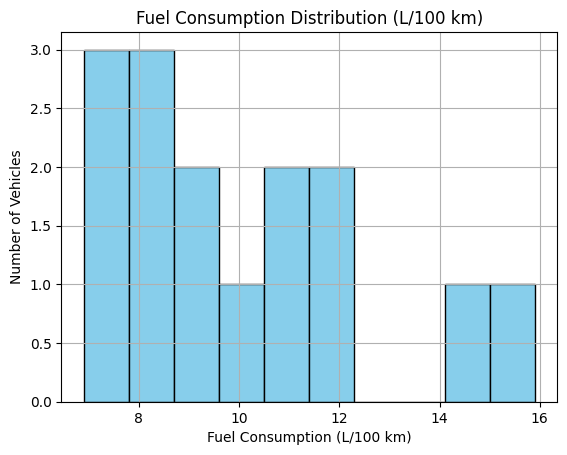

In [3]:
import matplotlib.pyplot as plt

df.plot.scatter(
    x="Engine Size(L)",
    y="Fuel Consumption Comb (L/100 km)",
    title = "Engine Size vs Fuel Consumption",
    xlabel="Engine Size (L)",
    ylabel="Fuel Consumption (L/100 km)",
    grid=True
)
plt.show()

df["Fuel Consumption Comb (L/100 km)"].plot.hist(
    bins=10,
    color="skyblue",
    edgecolor="black",
    title="Fuel Consumption Distribution (L/100 km)",
)
plt.xlabel("Fuel Consumption (L/100 km)")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.show()
    

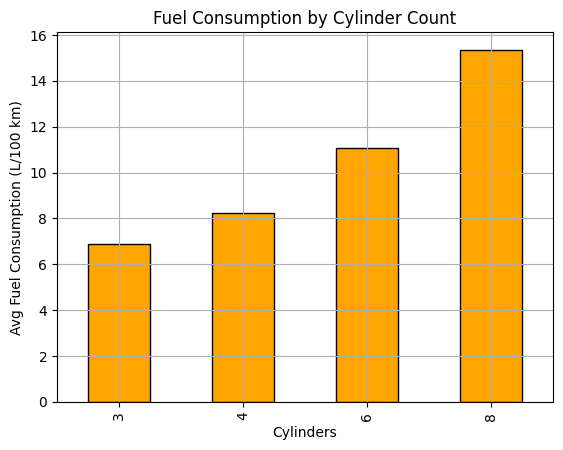

In [4]:
avg_by_cyl = df.groupby("Cylinders")["Fuel Consumption Comb (L/100 km)"].mean()
avg_by_cyl

avg_by_cyl.plot(kind="bar", color="orange", edgecolor="black", grid=True)
plt.xlabel("Cylinders")
plt.ylabel("Avg Fuel Consumption (L/100 km)")
plt.title("Fuel Consumption by Cylinder Count")
plt.show()

In [13]:
df_clean = df.dropna()
df_clean = df_clean.drop_duplicates()
df_clean = df_clean.reset_index(drop=True)
df_clean.head()
df_clean.to_csv("../data/fuel_clean.csv", index=False)